In [1]:
import disc_class as dc;
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Python library for protoplanetary disk imaging

In this notebook I show how to use the plot functions of the __disc\_class__. I created this class for my summer student project in 2016. I found there is a lack of python tools for visualize protoplanetary discs, thus I decided to share my raw functions for plotting 2D FARGO uotput discs using python. These are raw functions just to show the basic concept how to plot discs with python. I not recomend to use this functions as a blackbox, however I sugest to change the code to create nice plots.

## The _disc_ class:

This is a python class describing proroplanetary discs. The disc objects requires 3 argumets:

- __r__: the radial grid (simulation units)
- __$\varphi$__: azimutal grid (simulation umits)
- __fname__: name of the imput file

thus a disc can be define the following way:

In [2]:
normdisc = dc.disc(r=256,phi=512,fname='initial_disc.dat');

There are some plot function to display the disc or some disc propertyes:

- radial plot
- polar plot
- radial profile
- azimutal profile
- combined plots

## Radial plot

The function __radial\_plot__ display the disc radial grid values against the azimutal grid values. And position the maximum to $\pi$.

__Arguments:__

- __output__: string, optional, name of the output picture.
- __g__: integer, optional, the so called gamma correction that raise the data to the power of g
- __norm__: disc-class object, optional, other (initial) disc configuration to normalize the plot

### Examples:

In [3]:
disc1 = dc.disc(256,512,'disc_t=1.dat');
disc2 = dc.disc(256,512,'disc_t=2.dat');

Plot disc1 without normalization and normalized with _normdisc_.

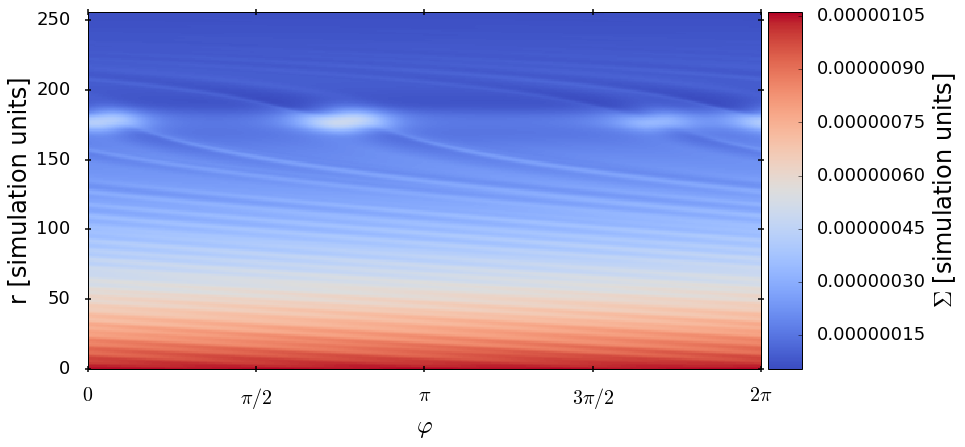

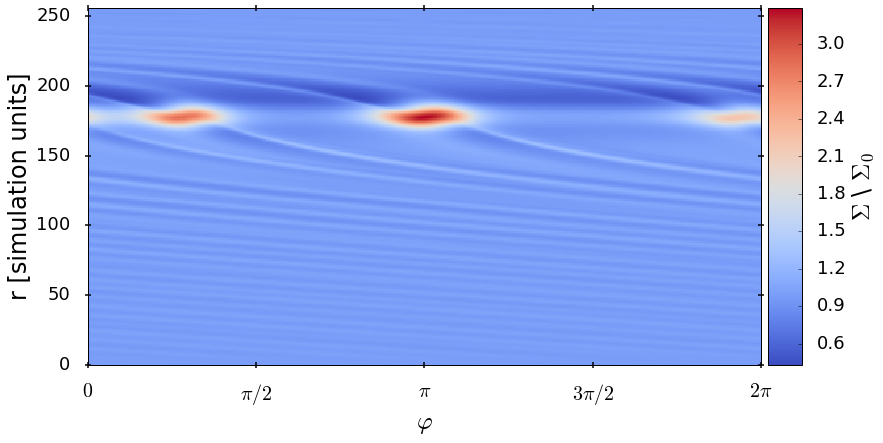

In [4]:
disc1.radial_plot();
disc1.radial_plot(norm=normdisc);

### to save the output image ###
#disc1.radial_plot(output='radial_example_plot.pdf',norm=normdisc);

Plot disc2 with normalization and with g=3 gamma correction.

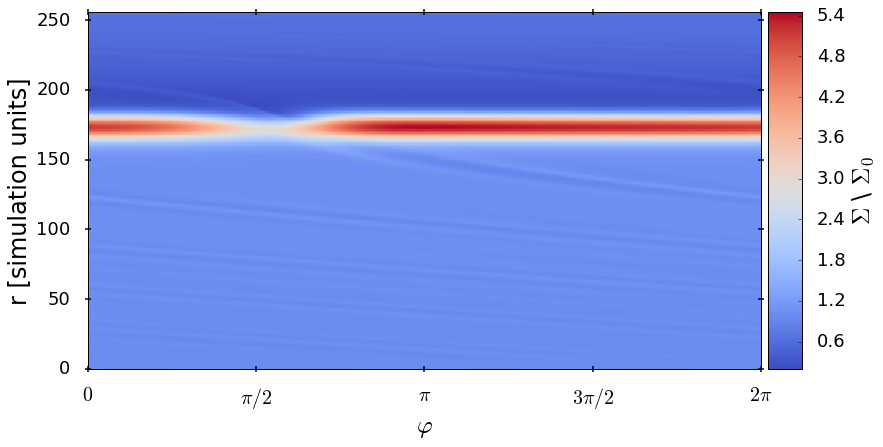

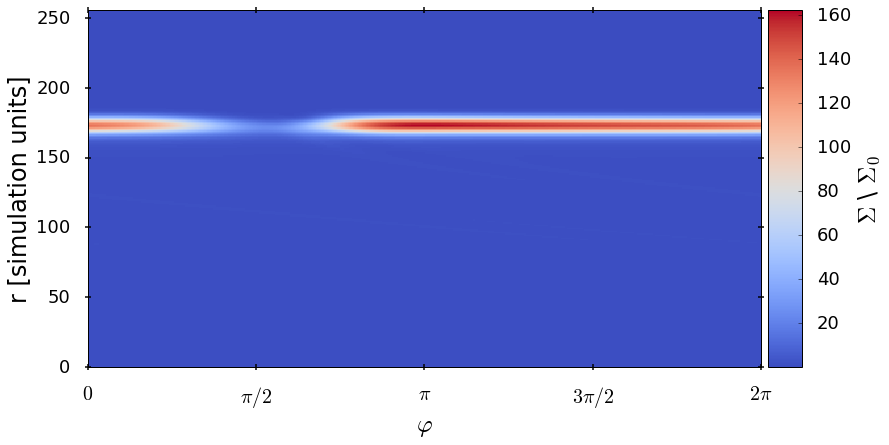

In [5]:
disc2.radial_plot(norm=normdisc);
disc2.radial_plot(g=3,norm=normdisc);

## Polar plot

The function __polar\_plot__ transform the FARGO output to polar coordinates. Display the transformed disk, with a blank ring at the center 10% of the maximal radius. And position the density maximum to $\pi$.

__Arguments:__

- __output__: string, optional, name of the output picture.
- __g__: integer, optional, the so called gamma correction that raise the data to the power of g
- __norm__: disc-class object, optional, other (initial) disc configuration to normalize the plot
- __polar_plot_radius__: int, optional, it define the plot box range
- __log_transform__: se description below

### Examples:

Plot disc2 with g=2 gamma correction and disc1 without correction. Both plots are normalized with _normdisc_. The second plot is a zoomed plot with a polar_plot_radius=200.

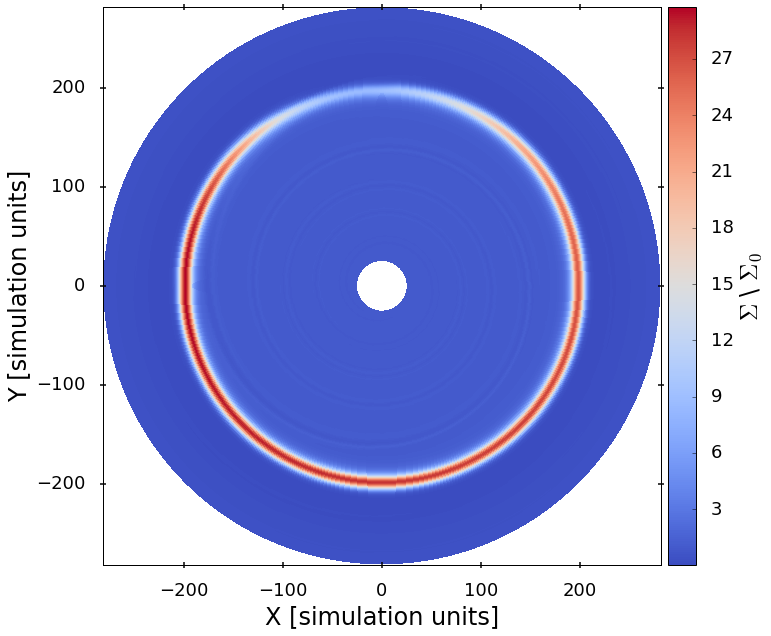

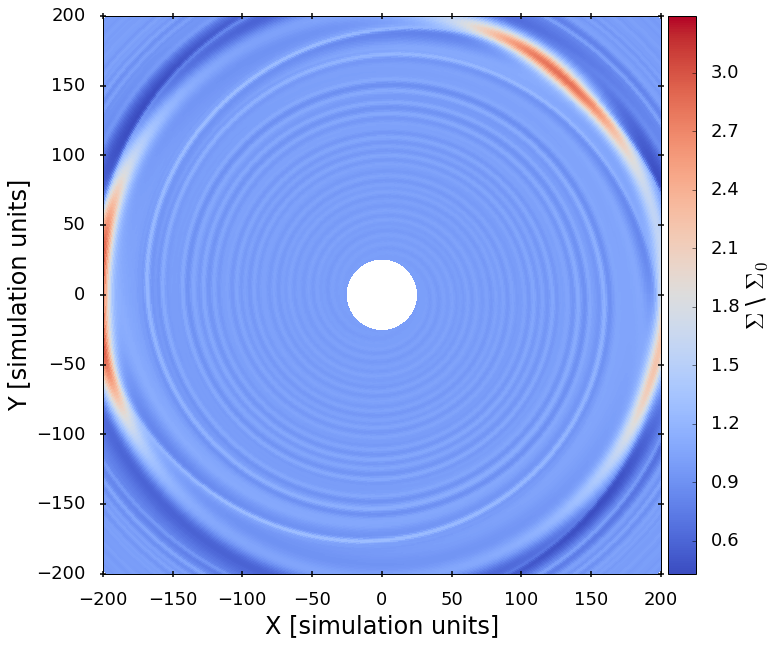

In [6]:
disc2.polar_plot(g=2,norm=normdisc);
disc1.polar_plot(g=1,norm=normdisc,polar_plot_radius=200);

As shown the zooming is not satisfying because in the example simulations I used logarythmic binning for the radial grid. This is a common practice. Thus the disc call __first function converts the simulation radila units to phisical dimension data__. It is written for my dataset, thus you need to rewrite it. Using this function, the polar plots will be much nicer, and these plots show the 'real' simulation results. If you wish to use this transformation, you need to set the __log\_transform__ variable to __True__. Let's see some examples! 

Plot disc2 with the transformed values and disc1 with the transformation with a polar_plot_radius=30.

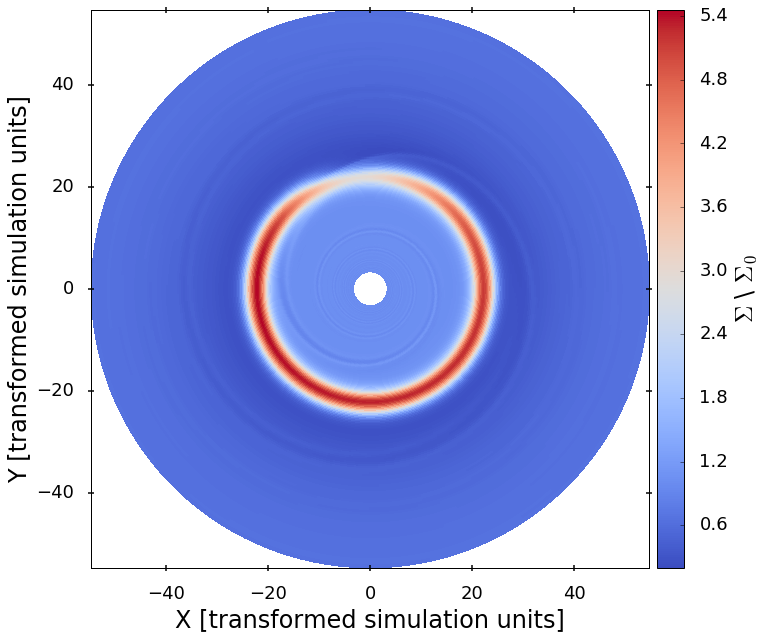

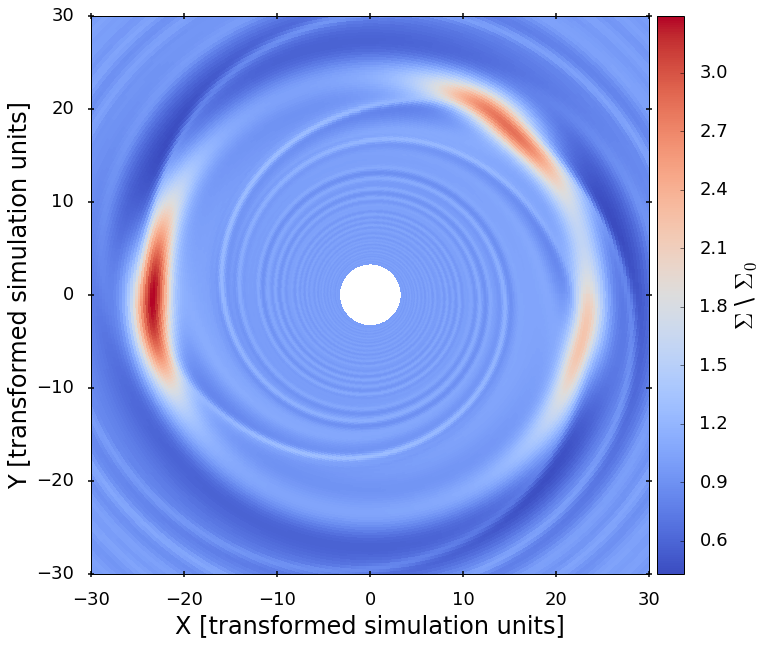

In [7]:
disc2.polar_plot(norm=normdisc,log_transform=True);
disc1.polar_plot(norm=normdisc,log_transform=True,polar_plot_radius=30)

You can use this feature later on with the other plot types if reasonable. It is not available on the radial_plot yet.

## Radial profile

The function __azimutaly\_averaged\_radial\_profile__ plots the azimutaly averaged radial profile as its name suggest. A typical function.

__Arguments:__

- __output__: string, optional, name of the output picture.
- __norm__: disc-class object, optional, other (initial) disc configuration to normalize the plot
- __log_transform__: False, optional. As described above set this value True to change the grid units.

### Examples:

Plot disc1 with no arguments and disc2 normalized and transformed to physical radial units.

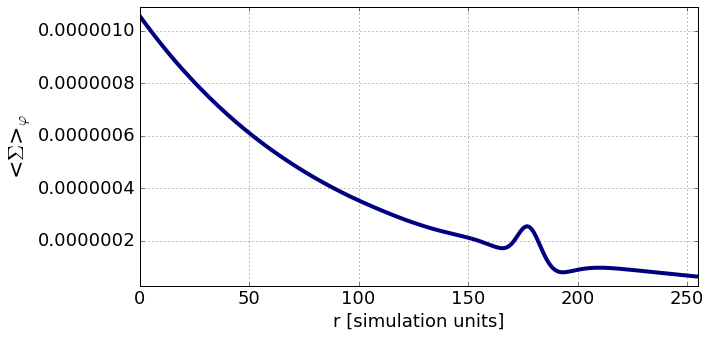

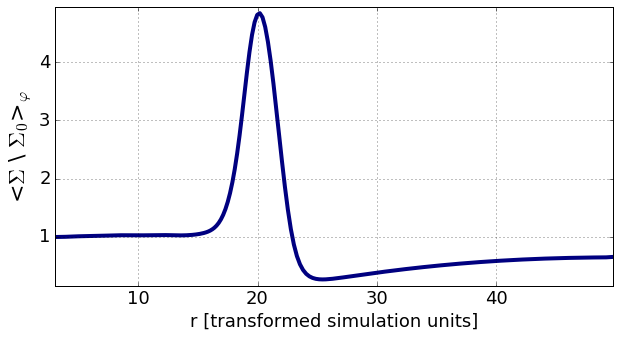

In [8]:
disc1.azimutaly_averaged_radial_profile();
disc2.azimutaly_averaged_radial_profile(norm=normdisc,log_transform=True);

## Azimutal profile

The function __azimutal\_profile\_around\_maxima__ plots the azimutal profile around the dr radius of the maximum. First the function finds the maximum index, and then radially average the azimautal profiles from maximum-dr to maximum+dr.

__Arguments:__

- __output__: string, optional, name of the output picture.
- __norm__: disc-class object, optional, other (initial) disc configuration to normalize the plot
- __dr__: int, initial value 10. This parameter define the radial widt of the averaged area

### Examples:

Normed plot of the disk1 and disk2 with dr=5 and dr=20, respectively.

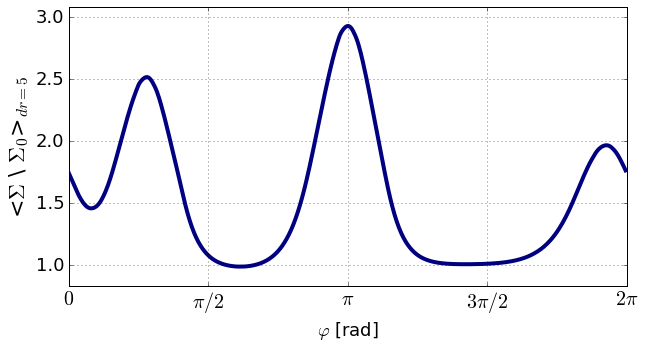

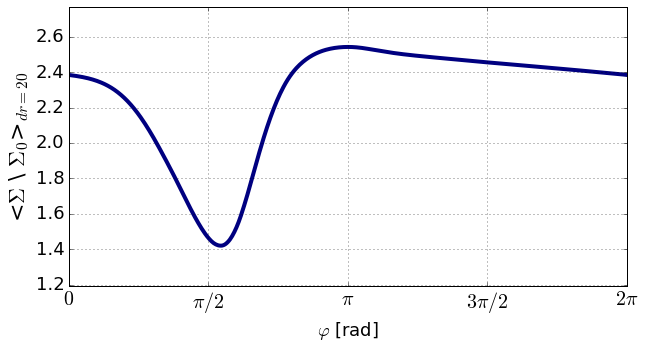

In [9]:
disc1.azimutal_profile_around_maxima(norm=normdisc,dr=5);
disc2.azimutal_profile_around_maxima(norm=normdisc,dr=20);

## Radial and azimutal profile

The function __radial\_and\_azimutal\_profile__ plot the prewious plots next to each other.

__Arguments:__

- __output__: string, optional, name of the output picture.
- __norm__: disc-class object, optional, other (initial) disc configuration to normalize the plot
- __dr__: int, initial value 10. This parameter define the radial widt of the averaged area
- __log_transform__: False, optional. As described above set this value True to change the grid units.

### Examples

Plot disc1 with dr=10 and log_transform=True.

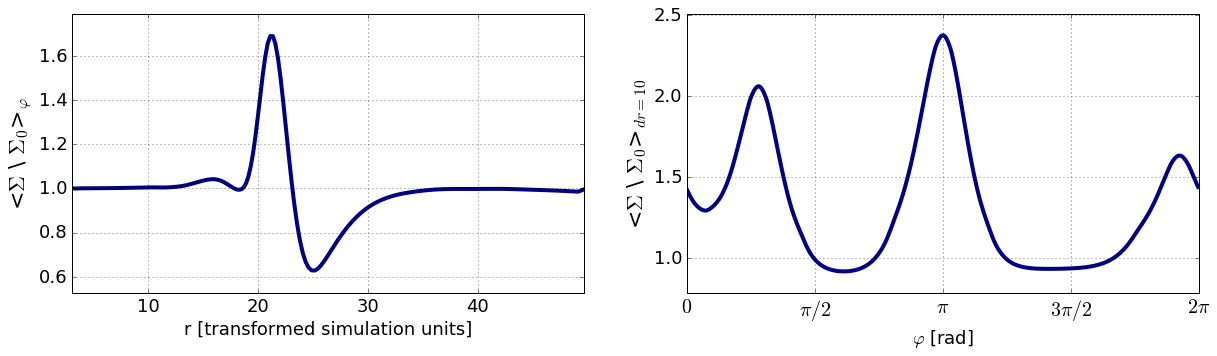

In [10]:
disc1.radial_and_azimutal_profile(norm=normdisc,dr=10,log_transform=True);

## Frame plot

The function __frame_plot__ plots the radial and azimutal profile and the polar plot into one plot.

__Arguments:__

- __output__: string, optional, name of the output picture.
- __norm__: disc-class object, optional, other (initial) disc configuration to normalize the plot
- __dr__: int, initial value 10. This parameter define the radial widt of the averaged area
- __g__: integer, optional, the so called gamma correction that raise the data to the power of g
- __polar_plot_radius__: int, optional, it define the plot box range
- __log_transform__: False, optional. As described above set this value True to change the grid units.
- __plot\_title__: Optional, title of the plot

### Example

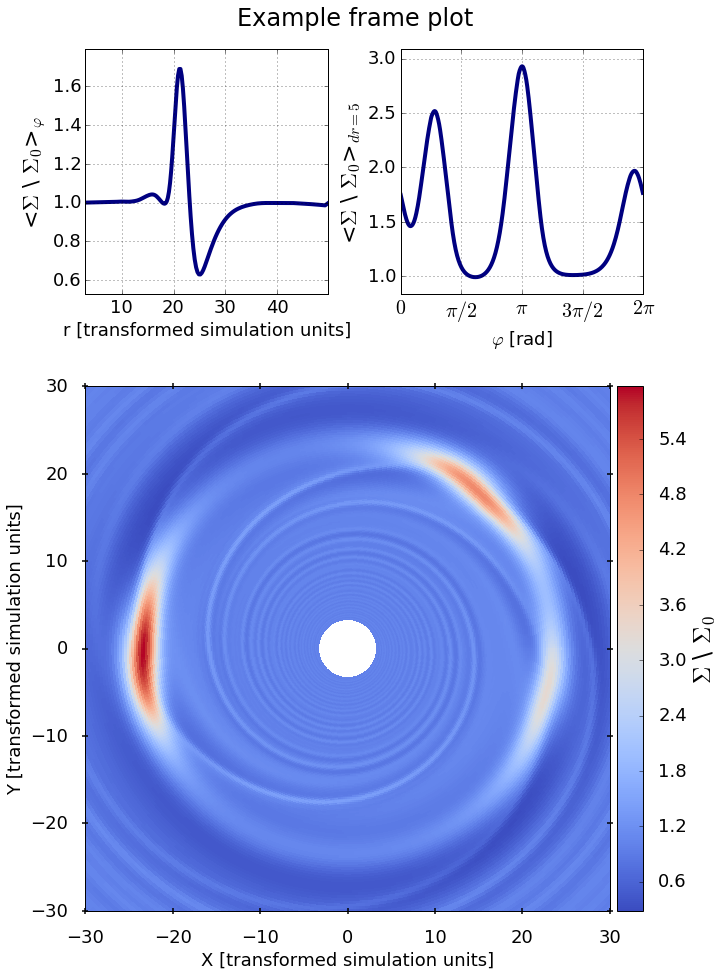

In [11]:
disc1.frame_plot(dr=5,norm=normdisc,g=1.5,plot_title='Example frame plot', log_transform=True,polar_plot_radius=30);
